# In this notebook, we map the images that you download from svrimg.org

#### First, we download the svrgis table, the svrimg index table, and the geog file

In [1]:
from svrimg.utils.get_tables import get_table, get_geog
from svrimg.utils.get_images import get_example

df_indexer = get_table(which='svrimg', haz_type='tor')
df_svrgis = get_table(which='svrgis', haz_type='tor')
geog = get_geog(data_dir="../data/geog/")
gridrad = get_example()

### df_indexer is a file that defines attributes of each image in the dataset.  See http://svrimg.org/raw_data.html

In [2]:
df_indexer.head()

,area,convection_area,filename,intense_area,intensity_variance,kind,max_intensity,mean_intensity,radar_file,radar_time,report_time,xmax,xmin,ymax,ymin
unid,,,,,,,,,,,,,,,
199601011725z000000001,76106.2500,11995.3125,/data/haberlie/report_boxes_gridrad/tor/1996/0...,84.3750,138.131259,tor,52,11.192366,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/1/1996 17:00,1/1/1996 17:25,1213,1078,247,112
199601030010z000000859,12150.0000,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.341792,tor,60,2.448692,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:10,1176,1041,405,270
199601030020z000000860,12079.6875,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.944422,tor,60,2.425011,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:20,1177,1042,405,270
199601031307z000000004,27393.7500,1378.1250,/data/haberlie/report_boxes_gridrad/tor/1996/0...,14.0625,84.373889,tor,54,4.590885,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 13:00,1/3/1996 13:07,1231,1096,176,41
199601031340z000000005,17100.0000,506.2500,/data/haberlie/report_boxes_gridrad/tor/1996/0...,0.0000,83.100461,tor,48,3.379163,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 14:00,1/3/1996 13:40,1234,1099,187,52


### df_svrgis is a file that contains all of the SVRGIS attributes.  Both files can be joined using the index column.

In [3]:
df_svrgis.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199601011725z000000001,1,3,FL,12,1,0,0,0,0.04,0.0,...,0,0,0,1996-01-01-11:25:00,1/1/1996 11:25,1/1/1996 17:25,1996,1,1,17
199601030010z000000859,859,3,SC,45,1,0,0,0,0.03,0.0,...,0,0,0,1996-01-02-18:10:00,1/2/1996 18:10,1/3/1996 0:10,1996,1,3,0
199601030020z000000860,860,3,SC,45,2,0,0,0,0.00,0.0,...,0,0,0,1996-01-02-18:20:00,1/2/1996 18:20,1/3/1996 0:20,1996,1,3,0
199601031307z000000004,4,3,FL,12,2,1,9,0,1.20,0.0,...,0,0,0,1996-01-03-07:07:00,1/3/1996 7:07,1/3/1996 13:07,1996,1,3,13
199601031340z000000005,5,3,FL,12,3,0,0,0,0.10,0.0,...,0,0,0,1996-01-03-07:40:00,1/3/1996 7:40,1/3/1996 13:40,1996,1,3,13


### geog is the grid information that will help us place the images correctly

In [4]:
geog

<xarray.Dataset>
Dimensions:  (Time: 1, south_north: 899, west_east: 1399)
Dimensions without coordinates: Time, south_north, west_east
Data variables:
    CLAT     (Time, south_north, west_east) float32 ...
    CLONG    (Time, south_north, west_east) float32 ...
Attributes:
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      1399
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        1400
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    899
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      900
    GRIDTYPE:                        C
    DX:                              3750.0
    DY:                              3750.0
    DYN_OPT:                         2
    CEN_LAT:                         38.500004
    CEN_LON:                         -97.5
    TRUELAT1:                        38.5
    TRUELAT2:                        38.5
    MOAD_CEN_LAT:                    38.500004
    STAND_LON:                       -97.5
    POLE_LAT:                        90.0
    POLE_LON:                        0.0
    corner_lats:                     [20.509216 48.89253  48.89253  20.509216...
    corner_lons:                     [-121.81102  -133.66338   -61.33661   -7...
    MAP_PROJ:                        1

### gridrad is interpolated gridrad data from April 27th at 1900 UTC. See http://gridrad.org.

In [5]:
gridrad

<xarray.Dataset>
Dimensions:   (time: 1, x: 1399, y: 899)
Coordinates:
  * time      (time) datetime64[ns] 2011-04-27T19:00:00
  * y         (y) float64 0.0 1.0 2.0 3.0 4.0 ... 894.0 895.0 896.0 897.0 898.0
  * x         (x) float64 0.0 1.0 2.0 3.0 ... 1.396e+03 1.397e+03 1.398e+03
Data variables:
    REFC_MAX  (time, y, x) uint8 ...
Attributes:
    name:                     GridRad analysis for 2011-04-27 19:00:00Z
    file:                     /data/haberlie/GRIDRAD_Raw/2011/04/nexrad_3d_v3...
    Analysis_time_window:     all azimuth scans (elevation angles) with centr...
    File_creation_date:       2017-06-03 05:25:53Z
    Grid_scheme:              regular longitude-latitude-altitude
    Algorithm_version:        v3_1
    Data_source:              National Oceanic and Atmospheric Administration...
    Data_source_URL:          https://www.ncdc.noaa.gov/data-access/radar-dat...
    NOAA_wct_export_Version:  The intermediate NetCDF volume scan files were ...
    Authors:                  Kenneth P. Bowman, Department of Atmospheric Sc...
    Project_sponsor:          National Science Foundation, Atmospheric and Ge...
    Project_name:             AGS-1522906 and 1522910; Collaborative Research...
    NOTE:                     Interpolated MAX COLUMN COMPOSITE REFLECTIVITY ...

## Example: April 27th 2011 at 1900 UTC

#### Plot the original data

PROJ: proj_create_from_database: Cannot find proj.db


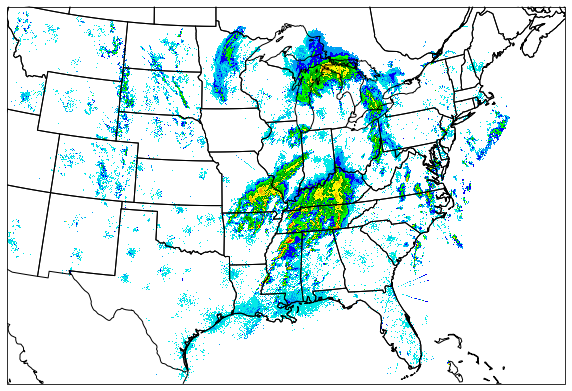

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

from svrimg.mapping.map_helper import radar_colormap
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-95))
ax.set_extent([-110, -70, 24, 48])
ax.coastlines()
ax.add_feature(cfeature.STATES)

cmap = radar_colormap()
classes = np.array(list(range(0, 85, 5)))
norm = BoundaryNorm(classes, ncolors=cmap.N)

ax.pcolormesh(geog.CLONG.squeeze(), geog.CLAT.squeeze(), gridrad.REFC_MAX.squeeze(),
              norm=norm, cmap=cmap, transform=ccrs.PlateCarree())

### Get a subset of the data where the radar time was '2011-04-27 19:00:00'

In [7]:
df_subset = df_indexer[df_indexer.radar_time=='4/27/2011 19:00']

df_subset

,area,convection_area,filename,intense_area,intensity_variance,kind,max_intensity,mean_intensity,radar_file,radar_time,report_time,xmax,xmin,ymax,ymin
unid,,,,,,,,,,,,,,,
201104271836z000303011,58767.1875,8100.0000,/data/haberlie/report_boxes_gridrad/tor/2011/0...,1350.0000,139.499248,tor,60,10.948529,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 18:36,961,826,397,262
201104271902z000300746,73926.5625,6412.5000,/data/haberlie/report_boxes_gridrad/tor/2011/0...,435.9375,162.687055,tor,59,11.611646,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 19:02,1067,932,434,299
201104271915z000300950,75445.3125,6328.1250,/data/haberlie/report_boxes_gridrad/tor/2011/0...,435.9375,165.765749,tor,59,11.751622,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 19:15,1071,936,439,304
201104271926z000300945,93628.1250,7129.6875,/data/haberlie/report_boxes_gridrad/tor/2011/0...,464.0625,157.152173,tor,59,13.979239,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 19:26,1059,924,443,308
201104271926z000300933,82378.1250,6342.1875,/data/haberlie/report_boxes_gridrad/tor/2011/0...,464.0625,151.617996,tor,59,12.607050,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 19:26,1055,920,430,295
201104271928z000303012,69848.4375,9309.3750,/data/haberlie/report_boxes_gridrad/tor/2011/0...,1448.4375,145.426695,tor,57,12.393220,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,4/27/2011 19:00,4/27/2011 19:28,978,843,410,275


### Use the image request utility to download the images associated with the unids and save them in "../data/tor"

In [8]:
from svrimg.utils.get_images import request_images

info = request_images(df_subset.index.values, haz_type='tor', data_dir="../data")

info

{'201104271836z000303011': '../data/tor/2011/201104271836z000303011.png',
 '201104271902z000300746': '../data/tor/2011/201104271902z000300746.png',
 '201104271915z000300950': '../data/tor/2011/201104271915z000300950.png',
 '201104271926z000300945': '../data/tor/2011/201104271926z000300945.png',
 '201104271926z000300933': '../data/tor/2011/201104271926z000300933.png',
 '201104271928z000303012': '../data/tor/2011/201104271928z000303012.png'}

### Read in the image

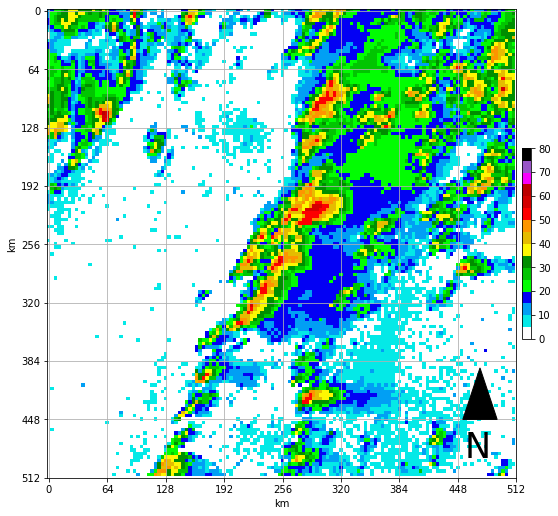

In [9]:
from svrimg.utils.get_images import read_image
from svrimg.mapping.map_helper import draw_box_plot

uid = "201104271836z000303011"
fname = info[uid]

im = read_image(fname)

ax = plt.subplot(1,1,1)
ax = draw_box_plot(ax, im)

### To get a sense of how this fits into the overall radar image, subtract it from the original data.

#### First get the bounds in pixel coordinates and then use those to insert the image data into a blank template.

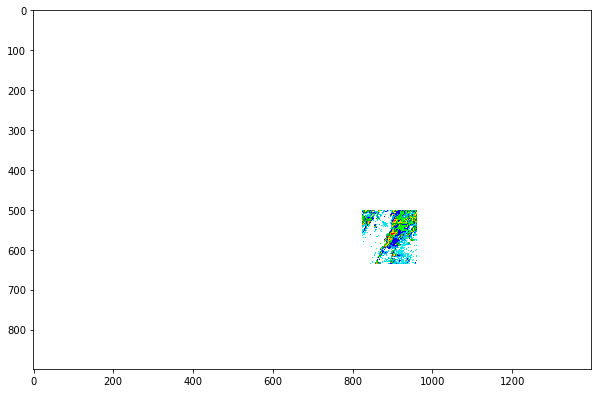

In [10]:
row = df_indexer.loc[uid]

blank = np.zeros(shape=(899, 1399))

blank[row.ymin:row.ymax+1, row.xmin:row.xmax+1] = im

plt.imshow(np.flipud(blank), cmap=cmap, norm=norm)

## You can see how it fits in the original image by subtracting it from the original data.

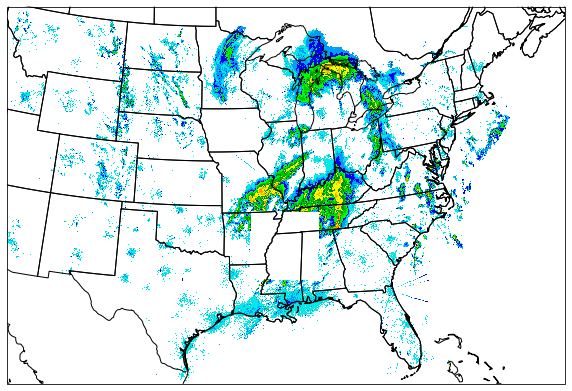

In [11]:
plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-95))
ax.set_extent([-110, -70, 24, 48])
ax.coastlines()
ax.add_feature(cfeature.STATES)

cmap = radar_colormap()
classes = np.array(list(range(0, 85, 5)))
norm = BoundaryNorm(classes, ncolors=cmap.N)

ax.pcolormesh(geog.CLONG.squeeze(), geog.CLAT.squeeze(), gridrad.REFC_MAX.squeeze() - blank,
              norm=norm, cmap=cmap, transform=ccrs.PlateCarree())

### The "cut out" area is exactly the same values as the original image, so subtraction sets everything to zero in that box.

## Try a different image

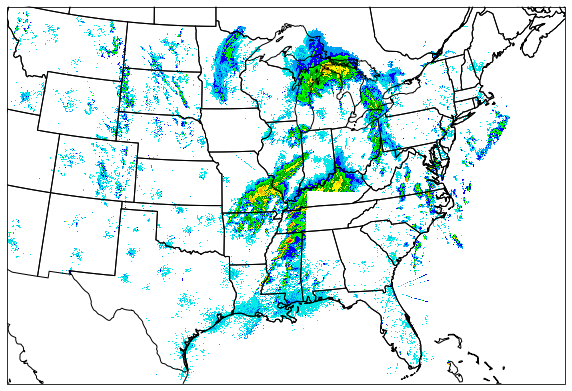

In [12]:
plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-95))
ax.set_extent([-110, -70, 24, 48])
ax.coastlines()
ax.add_feature(cfeature.STATES)


uid = "201104271915z000300950"
fname = info[uid]
im = read_image(fname)

row = df_indexer.loc[uid]
blank = np.zeros(shape=(899, 1399))
blank[row.ymin:row.ymax+1, row.xmin:row.xmax+1] = im

ax.pcolormesh(geog.CLONG.squeeze(), geog.CLAT.squeeze(), gridrad.REFC_MAX.squeeze() - blank,
              norm=norm, cmap=cmap, transform=ccrs.PlateCarree())

### Combine into one function

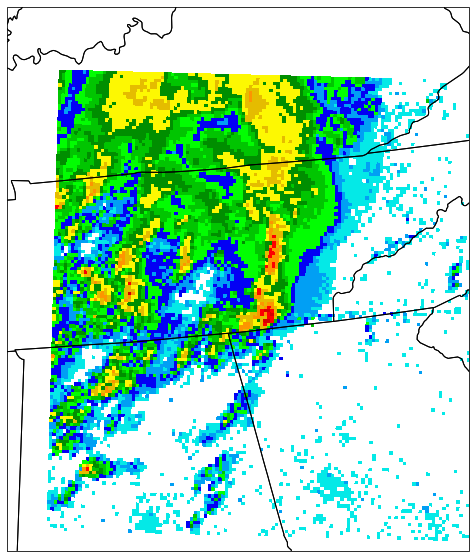

In [13]:
from svrimg.utils.get_images import geo_read_image

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-95))
ax.set_extent([-88, -83, 33, 38])
ax.coastlines()
ax.add_feature(cfeature.STATES)

vals = geo_read_image(df_indexer, info, "201104271915z000300950")

ax.pcolormesh(geog.CLONG.squeeze(), geog.CLAT.squeeze(), vals,
              norm=norm, cmap=cmap, transform=ccrs.PlateCarree())